# Part 1: Understanding and defining the problem



### Q1: Define the machine learning problem of this problem (supervised, unsupervised, binaryclassification, etc.) 

target이 1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non-vulnerable households로 명목형 자료로 있기 때문에 지도학습이며 4가지 target으로 분류하기에 다중 분류이다. Multi classification

### Q2: Explain the meaning of the target and the categories of the target.

target은 feature에 관한 data를 기반으로 구하고자하는 변수이다. 지금 여기서의 target은 소득수준으로 1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non-vulnerable household의 명목형 자료로 분류하려한다.

### Q3: Determine what methods can be done to get the prediction for each household, and not for each individual.

idhoger라는 feature가 각 가정의 고유id이기 때문에 idhoger가 같은 개인을 묶어 한 가정의 자료로 만들고, 무의미한 feature는 제거하고 유의미한 feature는 유지하여 예측한다. ex)무의미한 남자,여자와 같은 성별은 제거한다.

### Q4: Some individuals belong to the label "no head of household". Determine what should be done with these individuals. 

가장을 표시하는것이기 때문에 무의미한 feature라고 생각되어진다. 값을 0으로 통일하거나 feature자체를 제거한다. 혹은 소수인 경우 해당 인물을 제거한다.

### Q5: Identify the features that seem important just by reading their definitions.

target이 소득수준을 구하는 것이기에 집 크기, 방 갯수 등 금전에 관련한 feature들이 중요할 것으로 생각되어진다. 월세값을 나타낸 v2a1, 방 갯수인 rooms, 침실의 인구 포화도(사람수 대비 방 갯수를 알수 있다.)인 hacdor, 물 공급여부인 abastaguano 등이 중요한 feature로 보여진다.


# Part 2: Data exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train.csv dataframe 형태로 변환
train_data=pd.read_csv('C:/Users/castl/Desktop/데이터 사이언스/Lab_assignment_3/train.csv')
train_data.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
# test.csv를 dataframe형태로 변환
test_data=pd.read_csv('C:/Users/castl/Desktop/데이터 사이언스/Lab_assignment_3/test.csv')
test_data.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
# train, test의 shape확인
print(train_data.shape,test_data.shape)

(9557, 143) (23856, 142)


### Q1: Identify the shapes of the train and test dataset. 

train의 shape:(9557,143)

test의 shape:(23856,142)

In [5]:
# train_data에서 'Target' feature를 추출하여 확인하였다.

train_target=train_data['Target']
train_target

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [6]:
train_target.unique()

array([4, 2, 3, 1], dtype=int64)

In [7]:
# 추후에 modeling할때를 위해 target을 numpy로 변환하였다.

target=train_target.to_numpy()
target=target.reshape(len(train_target),1)
target

array([[4],
       [4],
       [4],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

### Q2: Identify, print, and explain the distribution of the target in train datasets.

위와 같이 확인해보니 Target값들이 구하고싶은 1,2,3,4의 명목형 자료인것을 확인 할 수 있었다. 또한 추후 modeling을 하기 위해서 target값을 따로 빼놓았다. train에서도 target을 지울예정이다.

In [8]:
# v2a1의 값마다 각각의target에 대한 갯수를 표시한다.

train_data.groupby(['v2a1','Target'])['Target'].count()

v2a1       Target
0.0        1          4
           2         12
           4         13
12000.0    2          3
13000.0    3          4
                     ..
770229.0   4          3
800000.0   4          4
855810.0   4         11
1000000.0  4          7
2353477.0  4          2
Name: Target, Length: 238, dtype: int64

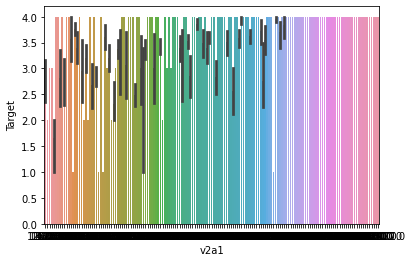

In [9]:
import seaborn as sns

sns.barplot(x='v2a1',y='Target',data=train_data)
plt.show()

In [10]:
# 총 방수에 대한 target과의 관계를 알아보았다.

train_data.groupby(['rooms','Target'])['Target'].count()

rooms  Target
1      1           23
       2           16
       3           19
       4           39
2      1           33
       2           41
       3           22
       4           92
3      1           81
       2          276
       3           98
       4          435
4      1          297
       2          529
       3          386
       4         1375
5      1          225
       2          430
       3          422
       4         1863
6      1           60
       2          210
       3          155
       4         1182
7      1           26
       2           68
       3           86
       4          552
8      1           10
       2           11
       3           14
       4          263
9      2           16
       3            7
       4          145
10     4           43
11     4            7
Name: Target, dtype: int64

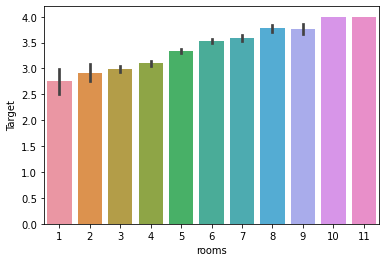

In [11]:
sns.barplot(x='rooms',y='Target',data=train_data)
plt.show()

In [12]:
# 침실당 인구포화도와 Target과의 관련도를 볼 수 있다.

train_data.groupby(['hacdor','Target'])['Target'].count()

hacdor  Target
0       1          644
        2         1489
        3         1150
        4         5910
1       1          111
        2          108
        3           59
        4           86
Name: Target, dtype: int64

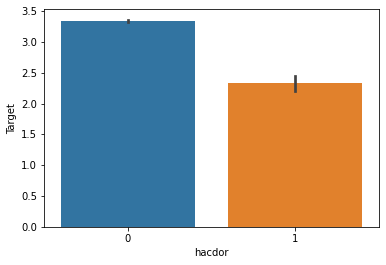

In [13]:
sns.barplot(x='hacdor',y='Target',data=train_data)
plt.show()

In [14]:
# 물 자가공급에 대한 Target과의 관련도이다.
train_data.groupby(['abastaguano','Target'])['Target'].count()

abastaguano  Target
0            1          752
             2         1574
             3         1204
             4         5993
1            1            3
             2           23
             3            5
             4            3
Name: Target, dtype: int64

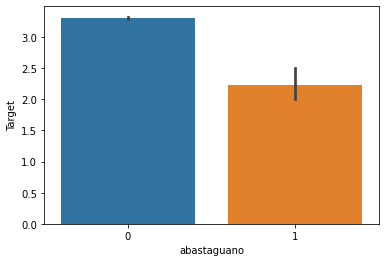

In [15]:
sns.barplot(x='abastaguano',y='Target',data=train_data)
plt.show()

### Q3: Using the important features you selected in the previous section, determine the various distributions and statistics of those selected features. Determine if the results strengthen your selection.

위와 같이 bar그래프와 target과 각각의 feature에 대한 수치를 숫자로 보니, v2a1은 월세가 비쌀수록 Target이 4가 많으며 적을수록 1이 많은 것을 확인 할 수 있었다. 하지만 rooms(방갯수)와의 Target과 관련성을 찾을 수 없었으며, 침실 인구포화도로는 Target이 작을수록 1의 포화도를 나타냄을 알 수 있었다. 물 자가공급은 전혀 관련없이 거의 모든 target이 0을 나타내어 상관이 없었다.

In [16]:
# 상관행렬을 각각의 feature에 대해 표현함. 이중 Target과 feature와의 관계에 집중하였음

train_data.corr(method='pearson')

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.000000,-0.091732,0.443461,-0.073509,0.033551,0.088970,0.278364,0.302292,-0.081900,-0.002401,...,0.358305,0.062343,-0.061309,0.364290,-0.082246,-0.191915,-0.061352,0.402561,0.062343,0.273559
hacdor,-0.091732,1.000000,-0.233369,0.652594,-0.175011,-0.101965,-0.084680,-0.049262,0.232508,0.059313,...,-0.109862,-0.102725,0.350546,-0.082229,0.388043,0.794699,0.005278,-0.099153,-0.102725,-0.191714
rooms,0.443461,-0.233369,1.000000,-0.213368,0.129183,0.130531,0.254256,0.208919,-0.066578,0.267627,...,0.233679,0.068288,0.221595,0.198890,0.007952,-0.355526,-0.027575,0.250061,0.068288,0.226208
hacapo,-0.073509,0.652594,-0.213368,1.000000,-0.150986,-0.124506,-0.067529,-0.037414,0.226378,0.126645,...,-0.092703,-0.075528,0.373720,-0.071170,0.367025,0.640096,0.014411,-0.103324,-0.075528,-0.138008
v14a,0.033551,-0.175011,0.129183,-0.150986,1.000000,0.143143,0.036396,0.011255,-0.054769,0.018133,...,0.036483,0.023831,0.009100,0.018897,-0.015193,-0.174969,0.005712,0.034711,0.023831,0.063382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBovercrowding,-0.191915,0.794699,-0.355526,0.640096,-0.174969,-0.123054,-0.125936,-0.062806,0.355660,0.144478,...,-0.201253,-0.218349,0.475192,-0.106004,0.477876,1.000000,-0.049525,-0.150997,-0.218349,-0.258744
SQBdependency,-0.061352,0.005278,-0.027575,0.014411,0.005712,-0.034080,-0.071504,-0.033226,-0.036977,-0.157357,...,-0.049172,0.395814,-0.104255,-0.032319,0.049113,-0.049525,1.000000,-0.065129,0.395814,-0.081695
SQBmeaned,0.402561,-0.099153,0.250061,-0.103324,0.034711,0.117406,0.302763,0.115522,-0.083552,-0.062217,...,0.510876,-0.112386,-0.067588,0.470993,-0.009591,-0.150997,-0.065129,1.000000,-0.112386,0.276620
agesq,0.062343,-0.102725,0.068288,-0.075528,0.023831,0.025846,-0.054670,-0.031046,-0.272690,-0.054712,...,0.051899,1.000000,-0.238110,-0.018314,-0.278921,-0.218349,0.395814,-0.112386,1.000000,0.075299


In [17]:
# pearson보다 spearman 계수가 해당 데이터(순서형자료)에 맞다고 생각함

train_data.corr(method='spearman')
train_data.corr(method='spearman').style.background_gradient(cmap='coolwarm')

C:\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [18]:
corr=train_data.corr(method='spearman')
corr[['Target']]

,Target
v2a1,0.355873
hacdor,-0.181526
rooms,0.231724
hacapo,-0.134006
v14a,0.065591
...,...
SQBovercrowding,-0.280675
SQBdependency,-0.340087
SQBmeaned,0.375767
agesq,0.133857


In [19]:
# 내림차순으로 정렬

corr[['Target']].sort_values(by=['Target'],axis=0,ascending=False)

,Target
Target,1.000000
meaneduc,0.375767
SQBmeaned,0.375767
v2a1,0.355873
cielorazo,0.313470
...,...
overcrowding,-0.280675
SQBhogar_nin,-0.304257
hogar_nin,-0.304257
SQBdependency,-0.340087


In [20]:
# 절대값을 취하여 top20을 추출

a=abs(corr[['Target']]).sort_values(by=['Target'],axis=0,ascending=False)
a.head(27)

,Target
Target,1.000000
meaneduc,0.375767
SQBmeaned,0.375767
v2a1,0.355873
SQBdependency,0.340087
cielorazo,0.313470
SQBescolari,0.311481
escolari,0.311481
SQBhogar_nin,0.304257
hogar_nin,0.304257


### Q4: Create a correlation matrix and determine which features are most correlated with the target. Explain and discuss the findings. 

위의 자료를 바탕으로 양의 관계를 띄는 상위 4개는 meanduc, SQBmeaned,v2a1, cielorazo가 있고 음의 상관관계를 띄는 상위 4개는 SQBdependency,hogar_nin, SQBhogar_nin, overcrowding이 있다. Target과 가장 관련있는 것은 meaneduc(어른들이 받은 평균 교육 년수)로 보여진다.

In [21]:
for i in train_data.columns:
    print (train_data[i].unique())

['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491']
[ 190000.  135000.      nan  180000.  130000.  100000.   90000.  215000.
  150000.  120000.   80000.  168000.   40000.  155000.  200000.  350000.
  270000.  300000.  250000.  260000.  564834.  175000.   25310.  400000.
  450000.  399378.  119813.  125518.  125000.   60000.   35000.  160000.
  170000.  500000.  230000.  185000.  220000.  570540.  342324.       0.
  127000.   52000.  240000.  278000.   70000.  110000.  100297.  210000.
  770229.  285270.  145000.   96000.  542013.   65000.   85000.  104000.
  275000.  140000.  280000.  105661.   20000.   16000.   55000.   30000.
  283000.  245000.  191500.  510000.   36350.   89000.  600000.   75000.
   50000.   84529.  550000.  132000.  470000.   27000.  176000.  205000.
  380000.  855810.  427905.  290975.  188000.  118097.  360000.  325000.
 1000000.  700000.  288750.  219087.   95000.   93000.  800000.  456432.
  142635.   97000.   51000.

### Q5: Determine if there are there any possible outliers? (You might have to take a look at all features)

위와 같이 각각의 feature들의 unique값들을 보며 이상하게 작거나, 큰 값이 있으면 이상치가 존재 한다고 판단할 수 있다.

# Part 3: Data preprocessing

### Q1: Determine how the outliers should be handled.

사분위 값의 편차를 이용하여 이상치를 추려낼수 있다.IQR의 1.5배를 하여 Q1,Q3에 각각 더하고 빼 최소, 최대값을 구한다. 최대값과 최소값 사이에 없는 값을 이상치로 판단하고 각각의 feature와 target에서 제거한다.

In [22]:
train_data.isnull().any()

Id                 False
v2a1                True
hacdor             False
rooms              False
hacapo             False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 143, dtype: bool

In [23]:
train_data['v2a1'].isnull().sum()

6860

In [24]:
# null이 있는 feature 찾아내기, 각 feature의 null 갯수도 확인

for i in train_data.columns:
    if train_data[i].isnull().sum()>0:
        print (i, train_data[i].isnull().sum())

v2a1 6860
v18q1 7342
rez_esc 7928
meaneduc 5
SQBmeaned 5


### Q2: Explore if there are any missing values in the data. 

위와 같이 v2a1, v18q1,rez_esc,meaneduc,SQBmeaned에 몇개의 null값이 있는지 확인하였다. 

### Q3: Determine how these missing values should be handled.

null수가 적은 meaneduc,SQBmeanes 같은 경우는 null값이 있는 해당 행만 삭제하거나, 평균값을 대입한다. 하지만 총 데이터인 9557개인 train에서 v18q1, rez_esc는 약 8000개의 데이터의 값이 null이므로 해당 feature를 삭제한다. v2a1은 중요한 feature이지만 6860개의 데이터가 null이기에 평균값을 넣거나, feature자체를 제거하는 것을 고려한다.

### Q4: Determine if some features need some labelling. Are there any other conversion of representation needed? 

instlevel1과 같은 명목형 자료(0,1로 구분됨)에서는 One Hot encoding을 진행하여 각각의 데이터가 고유한 값을 갖도록 한다.

### Q5: Determine if some feature engineering can be done and perform them as determined.

In [25]:
tmp=train_data
tmp

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [26]:
tmp1=tmp.drop(['v18q1','rez_esc','idhogar','dependency','edjefe','edjefa','Id'],axis=1)
tmp1

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [27]:
tmp1['v2a1'].replace('NAN','165231')
tmp1.dropna(axis=0,how='any')

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
5,180000.0,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.0000,121.0000,1444,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [28]:
tmp1_target=tmp1['Target'].to_numpy()
tmp1_target=tmp1_target.reshape(len(tmp1),1)
tmp1_target

array([[4],
       [4],
       [4],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [29]:
tmp1=tmp1.drop(['Target'],axis=1)
tmp1

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,0,1,1,...,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849
1,135000.0,0,4,0,1,1,1,0,1,1,...,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489
2,NaN,0,8,0,1,1,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464
3,180000.0,0,5,0,1,1,1,0,2,2,...,17,81,289,16,121,4,1.777778,1.0000,121.0000,289
4,180000.0,0,5,0,1,1,1,0,2,2,...,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116
9553,80000.0,0,6,0,1,1,0,0,2,2,...,2,0,4,25,81,1,1.562500,0.0625,68.0625,4
9554,80000.0,0,6,0,1,1,0,0,2,2,...,50,25,2500,25,81,1,1.562500,0.0625,68.0625,2500
9555,80000.0,0,6,0,1,1,0,0,2,2,...,26,121,676,25,81,1,1.562500,0.0625,68.0625,676


In [30]:
tmp2=tmp.drop(['v18q1','rez_esc','idhogar','dependency','edjefe','edjefa','Id'],axis=1)
tmp2

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [31]:
tmp2['v2a1'].fillna(tmp2['v2a1'].mean(),inplace=True)
tmp2['meaneduc'].fillna(tmp2['meaneduc'].mean(),inplace=True)
tmp2['SQBmeaned'].fillna(tmp2['SQBmeaned'].mean(),inplace=True)
tmp2['v2a1'].replace('NAN','165231.606971')
tmp2

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.000000,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.000000,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,165231.606971,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.000000,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.000000,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.000000,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.000000,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.000000,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.000000,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [32]:
tmp2_target=tmp2['Target'].to_numpy()
tmp2_target=tmp2_target.reshape(len(tmp2),1)
tmp2_target

array([[4],
       [4],
       [4],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [33]:
tmp2=tmp2.drop(['Target'],axis=1)
tmp2

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.000000,0,3,0,1,1,0,0,1,1,...,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849
1,135000.000000,0,4,0,1,1,1,0,1,1,...,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489
2,165231.606971,0,8,0,1,1,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464
3,180000.000000,0,5,0,1,1,1,0,2,2,...,17,81,289,16,121,4,1.777778,1.0000,121.0000,289
4,180000.000000,0,5,0,1,1,1,0,2,2,...,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.000000,0,6,0,1,1,0,0,2,2,...,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116
9553,80000.000000,0,6,0,1,1,0,0,2,2,...,2,0,4,25,81,1,1.562500,0.0625,68.0625,4
9554,80000.000000,0,6,0,1,1,0,0,2,2,...,50,25,2500,25,81,1,1.562500,0.0625,68.0625,2500
9555,80000.000000,0,6,0,1,1,0,0,2,2,...,26,121,676,25,81,1,1.562500,0.0625,68.0625,676


In [34]:
tmp3=tmp[['meaneduc','SQBmeaned','v2a1','SQBdependency','cielorazo','SQBescolari','escolari','SQBhogar_nin','hogar_nin','eviv3','epared3','pisomoscer','overcrowding','SQBovercrowding','r4t1','paredblolad','etecho3','v18q','rooms','instlevel8','r4m1','r4h1','Target']]
tmp3

,meaneduc,SQBmeaned,v2a1,SQBdependency,cielorazo,SQBescolari,escolari,SQBhogar_nin,hogar_nin,eviv3,...,SQBovercrowding,r4t1,paredblolad,etecho3,v18q,rooms,instlevel8,r4m1,r4h1,Target
0,10.00,100.0000,190000.0,0.0000,1,100,10,0,0,0,...,1.000000,0,1,0,0,3,0,0,0,4
1,12.00,144.0000,135000.0,64.0000,1,144,12,0,0,0,...,1.000000,0,0,0,1,4,1,0,0,4
2,11.00,121.0000,NaN,64.0000,1,121,11,0,0,1,...,0.250000,0,0,1,0,8,0,0,0,4
3,11.00,121.0000,180000.0,1.0000,1,81,9,4,2,1,...,1.777778,1,1,1,1,5,0,1,0,4
4,11.00,121.0000,180000.0,1.0000,1,121,11,4,2,1,...,1.777778,1,1,1,1,5,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,8.25,68.0625,80000.0,0.0625,1,81,9,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9553,8.25,68.0625,80000.0,0.0625,1,0,0,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9554,8.25,68.0625,80000.0,0.0625,1,25,5,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9555,8.25,68.0625,80000.0,0.0625,1,121,11,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2


In [35]:
tmp3['v2a1'].fillna(tmp3['v2a1'].mean(),inplace=True)
tmp3['meaneduc'].fillna(tmp3['meaneduc'].mean(),inplace=True)
tmp3['SQBmeaned'].fillna(tmp3['SQBmeaned'].mean(),inplace=True)
tmp3['v2a1'].replace('NAN','165231.606971')
tmp3

C:\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,meaneduc,SQBmeaned,v2a1,SQBdependency,cielorazo,SQBescolari,escolari,SQBhogar_nin,hogar_nin,eviv3,...,SQBovercrowding,r4t1,paredblolad,etecho3,v18q,rooms,instlevel8,r4m1,r4h1,Target
0,10.00,100.0000,190000.000000,0.0000,1,100,10,0,0,0,...,1.000000,0,1,0,0,3,0,0,0,4
1,12.00,144.0000,135000.000000,64.0000,1,144,12,0,0,0,...,1.000000,0,0,0,1,4,1,0,0,4
2,11.00,121.0000,165231.606971,64.0000,1,121,11,0,0,1,...,0.250000,0,0,1,0,8,0,0,0,4
3,11.00,121.0000,180000.000000,1.0000,1,81,9,4,2,1,...,1.777778,1,1,1,1,5,0,1,0,4
4,11.00,121.0000,180000.000000,1.0000,1,121,11,4,2,1,...,1.777778,1,1,1,1,5,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,8.25,68.0625,80000.000000,0.0625,1,81,9,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9553,8.25,68.0625,80000.000000,0.0625,1,0,0,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9554,8.25,68.0625,80000.000000,0.0625,1,25,5,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2
9555,8.25,68.0625,80000.000000,0.0625,1,121,11,1,1,0,...,1.562500,1,1,0,0,6,0,1,0,2


In [36]:
for i in tmp3.columns:
    print (tmp3[i].unique())

[10.         12.         11.         23.          9.5        17.
 13.5        10.333333   15.          6.6666665   5.25        7.
 15.5         9.         13.         14.         16.5        14.333333
  9.333333    6.5         6.          8.          4.         11.5
 12.75       12.5         5.5         7.7777777   7.5         4.5
 11.333333    6.25       16.         19.          5.         12.25
  5.6666665   9.666667    2.         10.5        11.4        11.75
 13.666667    2.5         8.666667    7.75       18.         14.5
  8.5         1.          6.2857141  10.25        3.5         4.3333335
  8.333333   14.2        18.5        21.          4.6666665  17.5
  9.25        9.75        7.6666665   8.6000004  15.666667   11.666667
  5.3333335   6.75       10.6         3.         20.         12.666667
 11.25        7.25        6.3333335   3.6666667  12.333333    8.75
 14.666667   17.333334   21.5         0.          8.8000002  10.666667
 13.75       13.333333   16.333334    7.3333335  

In [37]:
tmp3_target=tmp3['Target'].to_numpy()
tmp3_target=tmp3_target.reshape(len(tmp3),1)
tmp3_target

array([[4],
       [4],
       [4],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [38]:
tmp3=tmp3.drop(['Target'],axis=1)
tmp3

,meaneduc,SQBmeaned,v2a1,SQBdependency,cielorazo,SQBescolari,escolari,SQBhogar_nin,hogar_nin,eviv3,...,overcrowding,SQBovercrowding,r4t1,paredblolad,etecho3,v18q,rooms,instlevel8,r4m1,r4h1
0,10.00,100.0000,190000.000000,0.0000,1,100,10,0,0,0,...,1.000000,1.000000,0,1,0,0,3,0,0,0
1,12.00,144.0000,135000.000000,64.0000,1,144,12,0,0,0,...,1.000000,1.000000,0,0,0,1,4,1,0,0
2,11.00,121.0000,165231.606971,64.0000,1,121,11,0,0,1,...,0.500000,0.250000,0,0,1,0,8,0,0,0
3,11.00,121.0000,180000.000000,1.0000,1,81,9,4,2,1,...,1.333333,1.777778,1,1,1,1,5,0,1,0
4,11.00,121.0000,180000.000000,1.0000,1,121,11,4,2,1,...,1.333333,1.777778,1,1,1,1,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,8.25,68.0625,80000.000000,0.0625,1,81,9,1,1,0,...,1.250000,1.562500,1,1,0,0,6,0,1,0
9553,8.25,68.0625,80000.000000,0.0625,1,0,0,1,1,0,...,1.250000,1.562500,1,1,0,0,6,0,1,0
9554,8.25,68.0625,80000.000000,0.0625,1,25,5,1,1,0,...,1.250000,1.562500,1,1,0,0,6,0,1,0
9555,8.25,68.0625,80000.000000,0.0625,1,121,11,1,1,0,...,1.250000,1.562500,1,1,0,0,6,0,1,0


In [39]:
# 원핫인코딩을 하여 계산할 수 없는 명목형 데이터의 구분을 줌
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
tmp3_ohe=ohe.fit_transform(tmp3).toarray()

In [40]:
tmp3_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Q5: Determine if some feature engineering can be done and perform them as determined.

tmp1은 결측치가 있는 행은 다 제거하였으며 무의미한 feature(id등)을 제거하였다. tmp2는 결측치 값을 제거하는 것이 아니라 평균값으로 대체하여 진행하였다.tmp3으로는 상관행렬에서 관련도가 높게 나온 상위 20개를 갖고 진행하였다. 

# Part 4: Machine learning implementation

In [41]:
# SVM을 사용항
# train값을 trian,test로 나누어 먼저 정확도 측정

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

trainX, testX, trainY, testY = train_test_split(tmp3_ohe, tmp3_target, test_size=0.2)

svm = SVC(kernel='rbf',C=10,gamma=0.1,random_state=0)
svm.fit(trainX, trainY)

print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


시험용 데이터로 측정한 정확도 = 0.93


In [42]:
# Kfold 검증
# 매번 검증할때마다 정확도를 저장하여 나중에 평균 정확도를 도출한다.

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold=KFold(n_splits=5)
n_iter=0
tmp3_accuracy=[]

for train_index, test_index in kfold.split(tmp3_ohe):
    X_train, X_test=tmp3_ohe[train_index],tmp3_ohe[test_index]
    Y_train, Y_test=tmp3_target[train_index],tmp3_target[test_index]
    
    svm.fit(X_train,Y_train)
    pred=svm.predict(X_test)
    n_iter+=1
    
    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
    
    tmp3_accuracy.append(accuracy)
    
print('\n 평균검증 정확도:',np.mean(tmp3_accuracy))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1 교차검증 정확도 :0.7244, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


2 교차검증 정확도 :0.6789, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3 교차검증 정확도 :0.6133, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


4 교차검증 정확도 :0.5474, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


5 교차검증 정확도 :0.5097, 학습 데이터 크기:7646, 검증 데이터 크기:1911

 평균검증 정확도: 0.6147400000000001


### Q1: Scale the preprocessed data if needed.
### Q2: Split the data into train and validation sets
### Q3: Determine the machine learning models to be used and perform them. (Apply K-Fold cross validation or any other methods to improve the results.)

svm을 사용하여 모델링을 진행하였다. train을0.8, test를 0.2를 갖고 진행하였더니 93%의 정확도를 보였다. Kfold를 사용하여 5개의 구역을 만들고 교차검증을 진행하였더니 평균 61%의 검증 정확도를 나타내었다.

# Part 5: Performance evaluation

In [43]:
# KNN을 사용하여

from sklearn.neighbors import KNeighborsClassifier
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX, trainY)

    print('시험용 데이터로 측정한 정확도 = %.2f' % knn.score(testX, testY))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.87


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.88


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.86


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.84


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.82


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.80


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.79


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.78


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


시험용 데이터로 측정한 정확도 = 0.77


In [44]:
# k-neighbors가 3일때 가장 높은 정확도를 냈기에 kfold를 사용하여 검증한다.

kfold=KFold(n_splits=5)
n_iter=0
tmp3_accuracy=[]

for train_index, test_index in kfold.split(tmp3_ohe):
    X_train, X_test=tmp3_ohe[train_index],tmp3_ohe[test_index]
    Y_train, Y_test=tmp3_target[train_index],tmp3_target[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,Y_train)
    pred=knn.predict(X_test)
    n_iter+=1
    
    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
    
    tmp3_accuracy.append(accuracy)
    
print('\n 평균검증 정확도:',np.mean(tmp3_accuracy))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


1 교차검증 정확도 :0.6475, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


2 교차검증 정확도 :0.6219, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


3 교차검증 정확도 :0.5819, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


4 교차검증 정확도 :0.4919, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


5 교차검증 정확도 :0.4783, 학습 데이터 크기:7646, 검증 데이터 크기:1911

 평균검증 정확도: 0.5643


In [45]:
# Naive Bayes를 사용하여 정확도 확인
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(trainX,trainY)
print('시험용 데이터로 측정한 정확도 = %.2f' % nb.score(testX, testY))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


시험용 데이터로 측정한 정확도 = 0.28


In [46]:
# 결정트리를 사용하여 정확도 확인

from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(trainX, trainY)

print('시험용 데이터로 측정한 정확도 = %.2f' % dtree.score(testX, testY))

시험용 데이터로 측정한 정확도 = 0.93


In [47]:
# k-neighbors가 3일때 가장 높은 정확도를 냈기에 kfold를 사용하여 검증한다.

kfold=KFold(n_splits=5)
n_iter=0
tmp3_accuracy=[]

for train_index, test_index in kfold.split(tmp3_ohe):
    X_train, X_test=tmp3_ohe[train_index],tmp3_ohe[test_index]
    Y_train, Y_test=tmp3_target[train_index],tmp3_target[test_index]
    
    dtree = DecisionTreeClassifier(random_state=0)
    dtree.fit(X_train,Y_train)
    pred=dtree.predict(X_test)
    n_iter+=1
    
    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
    
    tmp3_accuracy.append(accuracy)
    
print('\n 평균검증 정확도:',np.mean(tmp3_accuracy))

1 교차검증 정확도 :0.6522, 학습 데이터 크기:7645, 검증 데이터 크기:1912
2 교차검증 정확도 :0.6355, 학습 데이터 크기:7645, 검증 데이터 크기:1912
3 교차검증 정확도 :0.5788, 학습 데이터 크기:7646, 검증 데이터 크기:1911
4 교차검증 정확도 :0.4882, 학습 데이터 크기:7646, 검증 데이터 크기:1911
5 교차검증 정확도 :0.4553, 학습 데이터 크기:7646, 검증 데이터 크기:1911

 평균검증 정확도: 0.562


### Q1: Determine the results.
svm은 약 93%의 정확도, kfold로는 평균 61%의 정확도를 보였고 KNN으로는 약 87%의 정확성 kfold검증으로는 56%의 검증정확도를 나타냈다. Naive Bayes는 29%정확도로 낮게 나타났으며 결정트리는 91%의 정확도를, kfold검증으로 56% 검증 정확도를 나타냈다.

### Q2: Explain the implementations of the results.
KNN은 k값을 바꾸어가며 제일 높은 정확도를 나타낼때를 찾았다. svm이 가장 높은 정확도를 보였다. 

### Q3: Determine if the results are satisfactory, and determine if improvements need to be made.
kfold검증을 하면서 정확도가 낮아져 만족스럽지는 않았다.

### Q4: If improvements need to be made, state the sections that improvements will be made and explain why.
다른 모델링과 더불어 다양한 앙상블기법과 더욱더 세밀한 데이터 전처리가 필요할 것으로 생각된다.그래서 staking ensemble을 통해 그동안 했던 모델링을 모두 사용하여 더 나은 정확도를 나타낸다.
 
### Q5: Determine and explain the limitations of your implementation.

현재 nan,빈칸 등 은 데이터 전처리 과정에서 제거했지만, 각 target,feature에 대한 이상치는 제거하지 못해 모델의 정확성이 떨어진 것으로 생각된다. 또한 one-hot-encoding을 원하는 feature만 해야하는데 전체 feature에 대해 하여 부정확하다.(v2a1은 one-hot-encoding을 하면 안될 것으로 생각한다.(수치형 데이터))

In [48]:
# staking 앙상블을 사용하여 3개의 모델을 스태킹하여 좀더 좋은 성능을 기대한다.
# lightgbm은 Gradient Boosting의 단점인 느린 학습시간을 보완한 방법으로, 대용량 데이터 처리가 가능하고, 다른 모델보다 더 적은 자원을 사용하며 빠르다.

from sklearn.ensemble import StackingClassifier
import lightgbm

def get_stacking():
    level0=[]
    level0.append(('svm',SVC(kernel='rbf',C=10,gamma=0.1,random_state=0)))
    level0.append(('knn',KNeighborsClassifier(n_neighbors=3)))
    level0.append(('dtree',DecisionTreeClassifier(random_state=0)))
    
    level1=lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
    
    model=StackingClassifier(estimators=level0, final_estimator=level1,cv=3)
    
    return model

stack=get_stacking()
stack.fit(trainX,trainY)
print('시험용 데이터로 측정한 정확도 = %.2f'% stack.score(testX, testY))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


시험용 데이터로 측정한 정확도 = 0.93


In [49]:
kfold=KFold(n_splits=5)
n_iter=0
tmp3_accuracy=[]

for train_index, test_index in kfold.split(tmp3_ohe):
    X_train, X_test=tmp3_ohe[train_index],tmp3_ohe[test_index]
    Y_train, Y_test=tmp3_target[train_index],tmp3_target[test_index]
    
    stack=get_stacking()
    stack.fit(trainX,trainY)
    pred=stack.predict(X_test)
    n_iter+=1
    
    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
    
    tmp3_accuracy.append(accuracy)
    
print('\n 평균검증 정확도:',np.mean(tmp3_accuracy))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1 교차검증 정확도 :0.9822, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


2 교차검증 정확도 :0.9796, 학습 데이터 크기:7645, 검증 데이터 크기:1912


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3 교차검증 정확도 :0.9785, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


4 교차검증 정확도 :0.9728, 학습 데이터 크기:7646, 검증 데이터 크기:1911


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


5 교차검증 정확도 :0.978, 학습 데이터 크기:7646, 검증 데이터 크기:1911

 평균검증 정확도: 0.97822


# Part 6: Conclusion
### Q1: Conclude the data science model that you have created.
stacking ensemble은 각각의 모델을 쌓아서 essemble한 방법으로

Level 0: training dataset을 이용하여 sub-model의 예측 결과를 생성한다.

Level 1: Level 0의 output결과가 level 1의 input으로 들어가며 모델링한다.

stack generalization 과정에서 level 0의 모델들은 다양한 예측 결과를 갖는 알고리즘을 사용하여 좋은 level 1모델을 생성하였다.
stacking기법을 사용한 모델은 시험용 데이터로 측정한 정확도가 92%로 나타났다. 교차 검증 정확도는 약 97%로 만족스럽게 나타났다.

### Q2: Give thorough discussions
주석을 달면서 진행하여 설명을 다했습니다. 아무래도 데이터 분석에서 제일 중요한 것은 모델링 보다 데이터 전처리가 중요하다고 생각되어졌습니다. 모델링은 내가 새로운 모델 알고리즘을 만드는것이 아닌이상 한정적이며(딥러닝이 아닌이상), 데이터 전처리를 잘해야지 질 높은 데이터로 더욱더 일반적이고 정확도 높은 모델링을 진행할 수 있다고 생각합니다.